# Logistic Regression Applied to Classification of Breast Tumors

In this notebook, we use logistic regression to classify breast tumors in two classes, benign or malignant.
The dataset used in this short tutorial is available here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/. *Note: there were a few missing data (label as '?') which were replaced with zeros*.

The whole documentation of the dataset can be seen in the ``breast-cancer-wisconsin.names`` file available in the link above. Nonetheless, I will briefly mention the characteristics of this dataset.

This dataset has nine interger-valued features that biologically characterizes a given tumor, e.g., size of the cell, clump thickness, etc. Every sample in the dataset has a label (or ``class``) which indicates whether the tumor is benign or malignant. Benign samples have ``class == 2`` whereas malignant samples have ``class == 4``.

## 1. Data Visualization
Let's load and visualize the dataset using Pandas

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)

In [2]:
names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
          'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
          'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [3]:
breast_cancer_df = pd.read_csv('breast-cancer-wisconsin.data', names=names)

In [4]:
breast_cancer_df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


Let's take a look at the distribution of the dataset:

In [5]:
benign_samples = breast_cancer_df[breast_cancer_df['Class'] == 2]

In [6]:
malignant_samples = breast_cancer_df[breast_cancer_df['Class'] == 4]

In [7]:
print("Percentage of benign examples: {}%".format(np.round(len(benign_samples) / len(breast_cancer_df) * 100)))

Percentage of benign examples: 66.0%


In [8]:
print("Percentage of malignant examples: {}%".format(np.round(len(malignant_samples) / len(breast_cancer_df) * 100)))

Percentage of malignant examples: 34.0%


## 2. Model fitting

Let's use Scikit-learn to split the dataset in training set and testing set:

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df.loc[:, 'Clump Thickness':'Mitoses'],
                                                    breast_cancer_df['Class'] / 2 - 1, test_size=.3)

Note that I scaled the `'Class'` label such that `0` represents benign sample and `1` represents malignant samples.
This has to be done solely because of the assumptions of the logistic regression algorithm implemented in ``macaw``.

Now, let's import the ``LogisticRegression`` objective function from ``macaw``:

In [11]:
from macaw.objective_functions import LogisticRegression

See https://mirca.github.io/macaw/api/objective_functions.html#macaw.objective_functions.LogisticRegression
for documentation.

Let's instantiate an object from ``LogisticRegression`` passing the labels ``y_train`` and the features ``X_train``:

In [12]:
logreg = LogisticRegression(y=np.array(y_train, dtype=float), X=np.array(X_train, dtype=float))

Let's use the method `fit` to get the maximum likelihood weights.

*Note that we need to pass an initial estimate for the linear weights and bias of the `LogisiticRegression`*:

In [13]:
res = logreg.fit(x0=np.zeros(X_train.shape[1] + 1))

The maximum likelihood weights can accessed using the ``.x`` attribute:

In [14]:
res.x

array([  0.67344859,  -0.12356275,   0.22360975,   0.37988553,
        -0.06955918,   0.48159258,   0.66077088,   0.25734695,
         0.5895142 , -11.20932873])

Additionally, we can check the status of the `fit` and the number of iterations that it took to converge.

In [15]:
res.status

'Success: loss function has not changed by 1e-09 since the previous iteration'

In [16]:
print("Number of iterations needed: {}".format(res.niters))

Number of iterations needed: 244


Now, let's compute the accuracy of our model using the test set. For that we can use the ``predict`` method passing the testing samples. This method outputs the class of each samples:

In [17]:
logreg.predict(np.array(X_test))

array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0

Now we can compute the percentage of samples correctly classified:

In [18]:
accuracy = np.round((np.array(y_test) == logreg.predict(np.array(X_test))).sum() / len(np.array(y_test)) * 100, decimals=5)

In [19]:
print('The accuracy of the model is {}%'.format(accuracy))

The accuracy of the model is 96.19048%


## 3. Comparison against scikit-learn

Let's compare ``macaw`` against ``scikit-learn``:

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logit = LogisticRegression()

In [22]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
logit.score(X_test, y_test)

0.96190476190476193

**Looks like** `macaw` **has a good agreement with** `sklearn` **:)!**

## 4. Logistic Regression with L1 Regularization

In [24]:
from macaw.objective_functions import L1LogisticRegression

In [25]:
alpha = [.1, 1., 10., 100.]

In [26]:
acc = []
for a in alpha:
    l1logreg = L1LogisticRegression(y=np.array(y_train, dtype=float), X=np.array(X_train, dtype=float), alpha=a)
    res_l1 = l1logreg.fit(x0=np.zeros(X_train.shape[1] + 1) + 1e-1)
    accuracy = np.round((np.array(y_test) == l1logreg.predict(np.array(X_test))).sum() / len(np.array(y_test)) * 100,
                        decimals=5)
    acc.append(accuracy)

In [27]:
acc

[95.238100000000003,
 95.714290000000005,
 96.190479999999994,
 62.380949999999999]

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

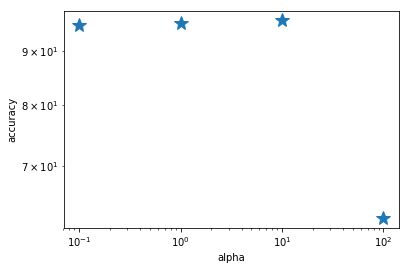

In [29]:
plt.loglog(alpha, acc, '*', markersize=15)
plt.ylabel('accuracy')
plt.xlabel('alpha')